In [ ]:
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import GridSearchCV
from surprise.model_selection import split
from surprise.prediction_algorithms.knns import KNNBasic
from surprise import accuracy
from surprise.model_selection import cross_validate
from sklearn import metrics
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# implementing user based collaborative filtering under SVD
# read in ratings.txt and documents.txt into pandas

# ratings dataframe
rating_raw = pd.read_csv('fairgrecs-dataset/ratings.txt', sep = '\t', header = [0])

rating_raw = rating_raw.truncate(50, 50000) #matching with other datasets

# user features dataframe (features of keyword)
doc_raw = pd.read_csv('fairgrecs-dataset/documents.txt', sep = '\t', header = [0])



# passing in users and items
users = rating_raw['USER_ID'].values.flatten()
items = rating_raw['DOCUMENT_ID'].values.flatten()
ratings = rating_raw['RATE'].values.flatten()

# passing in user features 
feature_name = doc_raw['{KEYWORDS}'].values.flatten()
feature_value = doc_raw['DOCUMENT_ID'].values.flatten()

In [ ]:
reader = Reader(rating_scale = (1,5))

data = Dataset.load_from_df(rating_raw[['USER_ID', 'DOCUMENT_ID', 'RATE']], reader)


In [ ]:
trainset, testset = split.train_test_split(data, test_size=0.25)

In [12]:
AUC_scores = []
rmse_scores = []

total_k = 30


for k in range(total_k): #takes a while to run
    
    
    algo_knn_basic = KNNBasic(k = k)
    algo = algo_knn_basic.fit(trainset)
    
    #test model
    predictions = algo.test(testset)    
    #cross validate

    results = cross_validate(
        algo = algo, data = data, measures=['RMSE'], 
        cv=5, return_train_measures=True
        )
    
    #get actual (index 2 of predictions) and estimates (index 3 of predictions)

    actual  = []
    predicts = []

    for i in range(len(predictions)):
        actual.append(predictions[i][2])
        predicts.append(predictions[i][3])

    fpr, tpr, thresholds = metrics.roc_curve(actual, predicts, pos_label=2)
    AUC_scores.append(metrics.auc(fpr, tpr))

    rmse_scores.append(results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

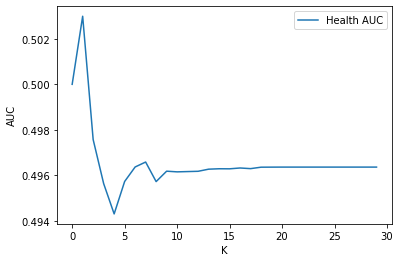

In [14]:
# Graph
x = np.arange(total_k)

plt.plot(x, np.array(AUC_scores))
plt.xlabel('K')
plt.ylabel('AUC')

plt.legend(['Health AUC'], loc = 'upper right')

plt.savefig('CF_Model_KNN_Health.png', facecolor = 'w')